In [469]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from random import randint
from IPython.display import Image

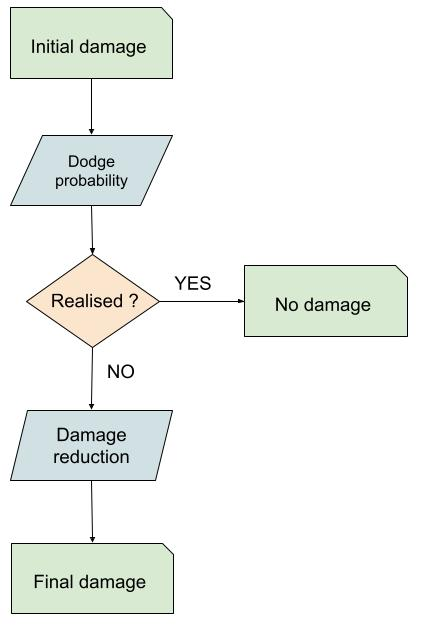

In [470]:
Image(filename='nb_figures/damage_algo.jpg')

## Armor damage reduction

Illustration of armor performance at 50 damage. The initial damage value is passed through a decreasing exponential function to determine the final damage value.

In [471]:
damage = 50
armor = 100
k = .04 # Decay rate

> **Parameter k** : *The decay rate. The greater the k, the faster the decay. We could say that k represents the “speed” at which the function decreases.* 
> 
> *The balance can be delicate because too high, a k value could make the armor far too powerful at its initial values. Conversely, too low, a k value would make armor points too volatile. In our configuration, a k value between 0.04 and 0.05 seems to give balanced armor performance.*

In [472]:
x = np.linspace(0, armor, armor)
y = damage * np.exp(-k * x)

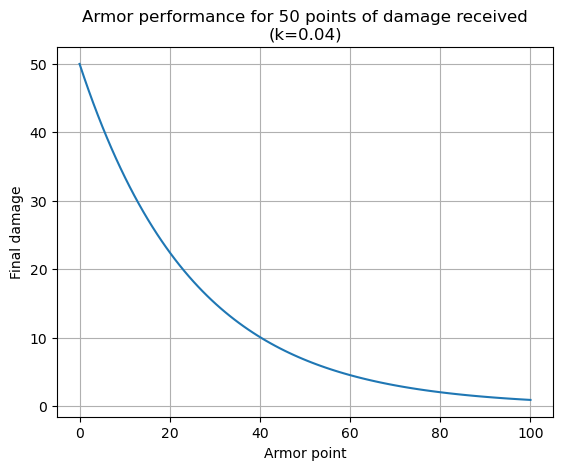

In [473]:
plt.plot(x, y)
plt.xlabel("Armor point")
plt.ylabel("Final damage")
plt.title(f"Armor performance for 50 points of damage received\n(k={k})")
plt.grid(True)
plt.show()

The final damage value corresponds to the damage that the armor could not absorb, so the armor points will be reduced by this same value. Thus, as the armor takes damage, its value decreases, making it less effective.

If a damage value is greater than the armor points, then the armor breaks and the unabsorbed damage values directly ​​affect the player's life points.

We can do a simulation of random hits received by the armor to illustrate its performance

In [474]:
# Simulation of a succession random hits received by the armor
k = .04
armor = 100
damage_range = (1, 50)
hits = 0 # Number of hits
arm_list = [armor] # List of armor values
dam_list = [] # List of random damage values

while True :
    damage = randint(damage_range[0], damage_range[1])
    dam_list.append(damage)
    x = np.linspace(0, armor, int(armor))
    y = damage * np.exp(-k * x)
    dam = y[-1] # Last value = first armor point
    hits += 1
    
    if dam < armor:
        #print(f"Hit {hits} | {damage} dam | armor : {round(armor, 3)} | armor damage : {round(dam, 3)}")
        armor -= dam
        arm_list.append(round(armor, 3))
    else:
        #print(f"Hit {hits} | {damage} dam | armor : {round(armor, 3)} | armor damage : {round(dam, 3)}")
        #print(f"BROKEN ARMOR -> -{round(dam-armor, 3)} hp")
        break

In [475]:
# Creating the axes
x = np.linspace(1, hits, hits)
y = np.array(arm_list)
z = np.array(dam_list)

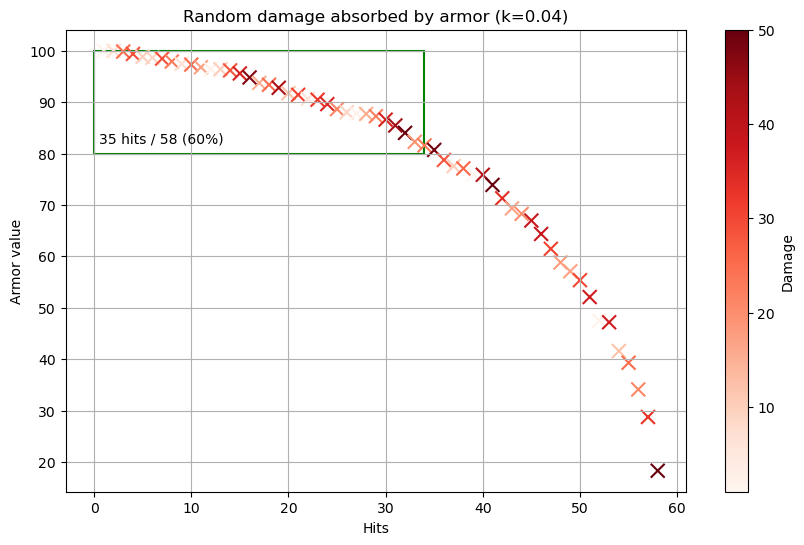

In [476]:
plt.figure(figsize=(10, 6))

# Retrieving the x coordinate where y = 80
mask = (y >= 80) & (y <= 100)
y_slice = y[mask]
x_idx = np.where(y == y_slice[-1])[0][0]

# Tracing the rectangle
rect = patches.Rectangle((0, 80), x_idx, 20, 
                         edgecolor="green", 
                         facecolor="none",
                         linewidth=1.5)
plt.gca().add_patch(rect)

# Text placement
slice_len = len(y_slice)
x_len = len(x)
slice_rate = int((slice_len / x_len) * 100)
plt.text(0.5, 82, f"{slice_len} hits / {x_len} ({slice_rate}%)")

# Scatter plot with color depending on z
scatter = plt.scatter(x, y, c=z, cmap='Reds', s=100, marker='x')

# Adding the color bar
plt.colorbar(scatter, label='Damage')

# Label titles
plt.title(f"Random damage absorbed by armor (k={k})")
plt.xlabel("Hits")
plt.ylabel("Armor value")

# Other options
plt.grid(True)

plt.show()

In our configuration, i.e. :
- **Parameter k** : 0.04
- **Full armor** : 100
- **Random damage** : between 1 and 50

The armor can withstand a little over 50 hits before completely giving way. The graph shows us that the majority of hits (more than half) are taken between 100 and 80 armor (green rectangle), which is a good indication of the high performance of the armor in its high values. Beyond that range, each hit becomes more and more impactful on the armor value.